In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("./Dataset/synthetic_logs.csv")
df.head()

,timestamp,source,log_message,target_label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status


In [3]:
df.source.unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI', 'LegacyCRM'], dtype=object)

In [4]:
df.target_label.unique()

array(['HTTP Status', 'Critical Error', 'Security Alert', 'Error',
       'System Notification', 'Resource Usage', 'User Action',
       'Workflow Error', 'Deprecation Warning'], dtype=object)

In [5]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN

/Users/rohandas/Documents/GitHub/ML_Project/jupyter_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model =SentenceTransformer('all-MiniLm-L6-v2')
embeddings = model.encode(df['log_message']).tolist()

dbscan = DBSCAN(eps=0.2, min_samples=1, metric='cosine')
clusters = dbscan.fit_predict(embeddings)

df['clusters'] = clusters
df.head()

,timestamp,source,log_message,target_label,clusters
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,0
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,0
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,0


In [7]:
print(df[df.clusters==12][:].to_string(index=False))

          timestamp          source                                                    log_message   target_label  clusters
    3/10/2025 23:11 AnalyticsEngine  Alert: brute force login attempt from 192.168.80.114 detected Security Alert        12
    1/22/2025 16:51        ModernHR Alert: brute force login attempt from 192.168.226.241 detected Security Alert        12
      6/9/2025 6:37       ModernCRM     Brute force login detected from IP 192.168.237.105 address Security Alert        12
      2/9/2025 7:08   BillingSystem     Brute force login detected from IP 192.168.246.138 address Security Alert        12
    10/24/2025 5:18       ModernCRM      Brute force login detected from IP 192.168.174.13 address Security Alert        12
    6/30/2025 22:15       ModernCRM Alert: brute force login attempt from 192.168.247.107 detected Security Alert        12
2025-05-18 00:53:30       ModernCRM        Brute force login detected from IP 22.8.230.208 address Security Alert        12
2025-05-

In [8]:
print(df[df.clusters==12][:]['log_message'].to_string(index=False))

Alert: brute force login attempt from 192.168.8...
Alert: brute force login attempt from 192.168.2...
Brute force login detected from IP 192.168.237....
Brute force login detected from IP 192.168.246....
Brute force login detected from IP 192.168.174....
Alert: brute force login attempt from 192.168.2...
Brute force login detected from IP 22.8.230.208...
Brute force login detected from IP 160.172.48.6...
Brute force login detected from IP 40.113.17.21...
Brute force login detected from IP 190.249.92.1...
Brute force login detected from IP 29.170.236.2...
Alert: brute force login attempt from 50.118.20...
Brute force login detected from IP 254.228.73.5...
Brute force login detected from IP 155.159.54.2...
Brute force login detected from IP 162.109.65.1...
Brute force login detected from IP 148.239.125....
Alert: brute force login attempt from 232.75.25...
Alert: brute force login attempt from 241.66.20...
Alert: brute force login attempt from 52.182.11...
Brute force login detected from

In [9]:
df.clusters.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

In [10]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

cluster_count = df['clusters'].value_counts()
large_clusters = cluster_count[cluster_count> 10].index

for cluster in large_clusters:
    print(f"cluster: {cluster}:")
    print(df[df['clusters']==cluster]['log_message'].head(5).to_string(index=False))
    print()

cluster: 0:
           nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" status: 200 len: 1893 time: 0.2675118
nova.osapi_compute.wsgi.server [req-4895c258-b2f8-488f-a2a3-4fae63982e48 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" HTTP status code -  200 len: 211 time: 0.0968180
            nova.osapi_compute.wsgi.server [req-ee8bc8ba-9265-4280-9215-dbe000a41209 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1" RCODE  200 len: 1874 time: 0.2280791
      nova.osapi_compute.wsgi.server [req-f0bffbc3-5ab0-4916-91c1-0a61dd7d4ec2 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 "GET /

In [11]:
import re 
def classify_with_regex(log_message): 
    regex_patterns = { 
    r"\s*User .* logged (in|out).*": "User Action", 
    r"\s*Backup (started|ended) at .*": "System Notification", 
    r"\s*Backup completed successfully.": "System Notification", 
    r"\s*System updated to version.*": "System Notification", 
    r"\s*File .*\.csv uploaded successfully by user .*": "System Notification", 
    r"\s*Disk cleanup completed successfully.": "System Notification", 
    r"\s*System reboot initiated by user .*": "System Notification", 
    r"\s*Account with ID .* created by .*": "User Action",
    r"\s*Anomalous traffic from .* flagged for review": "Security Alert",
    r"\s*IP .* blocked due to potential attack": "Security Alert",
    r"\s*Warning: potential password cracking attempt from .*": "Security Alert",
    r"\s*Possible hacking attempt identified from IP .*": "Security Alert",
    r"\s*IP .* flagged for potential (security|cyber) threat": "Security Alert",
    r"\s*(Unusual|Unauthorised) access attempt from .* (logged|detected)": "Security Alert",
    r"\s*Alert: brute force login attempt from .* detected": "Security Alert",
    r"\s*Brute force login detected from IP .* address": "Security Alert"
    }

    for pattern, label in regex_patterns.items():
        if re.search(pattern, log_message, re.IGNORECASE):
            return label
    return None

In [12]:
print(classify_with_regex("hello"))

None


In [13]:
df['regex_label'] = df['log_message'].apply(classify_with_regex)

In [14]:
df[df.regex_label.notnull()].shape

(618, 6)

In [15]:
df.shape

(4873, 6)

In [16]:
df_non_regex = df[df['regex_label'].isnull()].copy()
df_non_regex.shape

(4255, 6)

In [17]:
print(df_non_regex['target_label'].value_counts()[df_non_regex['target_label'].value_counts() <=15].index.tolist())

['Workflow Error', 'Deprecation Warning']


In [18]:
df_non_lecacy = df_non_regex[df_non_regex['source'] != 'LegacyCRM'].copy()
df_non_lecacy.reset_index(drop=True, inplace=True)

df_non_lecacy['source'].unique()

array(['ModernCRM', 'AnalyticsEngine', 'ModernHR', 'BillingSystem',
       'ThirdPartyAPI'], dtype=object)

In [183]:
filtered_embeddings = model.encode(df_non_lecacy['log_message']).tolist()

In [193]:
X = filtered_embeddings
y = df_non_lecacy['target_label']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

                precision    recall  f1-score   support

Critical Error       0.96      0.96      0.96        51
         Error       0.97      0.97      0.97        63
   HTTP Status       1.00      1.00      1.00       937
Resource Usage       1.00      1.00      1.00        50
Security Alert       1.00      1.00      1.00       171

      accuracy                           1.00      1272
     macro avg       0.99      0.99      0.99      1272
  weighted avg       1.00      1.00      1.00      1272



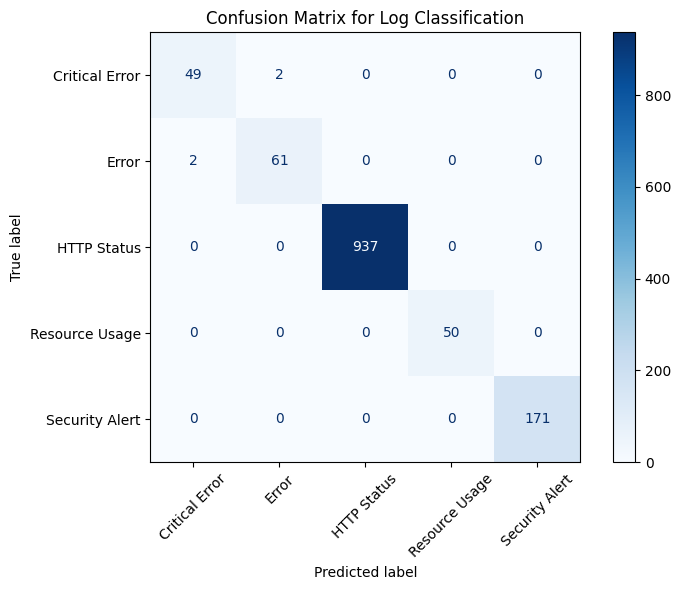

In [194]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Confusion Matrix for Log Classification")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [199]:
import joblib

joblib.dump(lr, '../Model/log_clf.joblib')

['../Model/log_clf.joblib']

In [19]:
df_non_lecacy

,timestamp,source,log_message,target_label,clusters,regex_label
0,2025-06-27 07:20:25,ModernCRM,"nova.osapi_compute.wsgi.server [req-b9718cd8-f65e-49cc-8349-6cf7122af137 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1"" status: 200 len: 1893 time: 0.2675118",HTTP Status,0,None
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,1,None
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,2,None
3,2025-07-12 00:24:16,ModernHR,"nova.osapi_compute.wsgi.server [req-4895c258-b2f8-488f-a2a3-4fae63982e48 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1"" HTTP status code - 200 len: 211 time: 0.0968180",HTTP Status,0,None
4,2025-06-02 18:25:23,BillingSystem,"nova.osapi_compute.wsgi.server [req-ee8bc8ba-9265-4280-9215-dbe000a41209 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 10.11.10.1 ""GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1"" RCODE 200 len: 1874 time: 0.2280791",HTTP Status,0,None
...,...,...,...,...,...,...
4233,2025-05-18 00:53:31,ModernHR,"nova.osapi_compute.wsgi.server [req-403846bd-dd0d-4472-a78d-6077e720094b 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 195.64.6.55 ""GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1"" Return code: 200 len: 1893 time: 0.2580168",HTTP Status,0,None
4234,2025-05-18 00:53:31,ThirdPartyAPI,"nova.osapi_compute.wsgi.server [req-9135d880-f631-446a-a1be-52240999a2a8 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 204.170.190.198 ""GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1"" Return code: 200 len: 1893 time: 0.2629149",HTTP Status,0,None
4235,2025-05-18 00:53:31,ModernHR,"nova.osapi_compute.wsgi.server [req-17ee8196-ec23-4adc-acc9-4c24686d8b68 113d3a99c3da401fbd62cc2caa5b96d2 54fadb412c4e40cdbaed9335e4c35a9e - - -] 20.226.81.146 ""GET /v2/54fadb412c4e40cdbaed9335e4c35a9e/servers/detail HTTP/1.1"" RCODE 200 len: 1893 time: 0.2791021",HTTP Status,0,None
4236,2025-05-18 00:53:31,AnalyticsEngine,Multiple login failures occurred on user x456 account,Security Alert,7,None
